# TASK 2

# Author: Omkar Patil

# Topic: Prediction Using Unsupervised Learning

### Ques: From the given ‘Iris’ flower dataset, predict the optimum number of clusters and represent it visually.

### Import the Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from io import StringIO
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
iris = pd.read_csv('Iris.csv')
x = iris.iloc[:,[0,1,2,3]].values

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [7]:
iris_outc = pd.crosstab(index = iris["Species"], columns = 'count')
iris_outc

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Gathering Intel On Data

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.drop("Id",axis=1,inplace=True) #Used for deleting duplicate data

In [11]:
iris_setosa = iris.loc[iris['Species']=='Iris-setosa']
iris_virginica = iris.loc[iris['Species']=='Iris-virginica']
iris_versicolor = iris.loc[iris['Species']=='Iris-versicolor']

### Getting Labels Of The Dataset

In [12]:
labels=iris["Species"]
label_names=labels.unique()
print(label_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Projection Of the Data

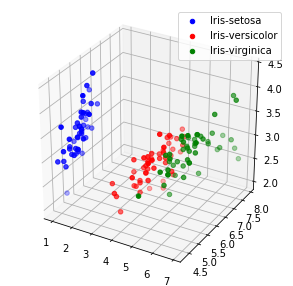

In [13]:
#Create an Axes3D:

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(5,5))
col=['b','r','g']
ax=plt.axes(projection= '3d')
for indx,l in enumerate(label_names):
    fram=iris.loc[iris['Species']==l]
    ax.scatter(fram["PetalLengthCm"],fram["SepalLengthCm"],fram["SepalWidthCm"],c=col[indx],marker='o',label=l)
ax.legend()
plt.show()

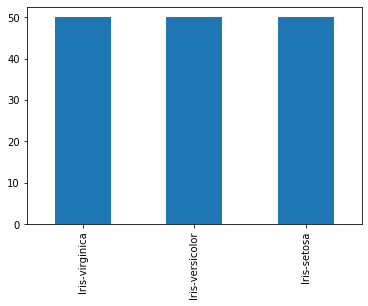

In [14]:
#Visualize the number of different species in pandas
iris["Species"].value_counts().plot.bar()
plt.show()

### Distribution plot for each specie

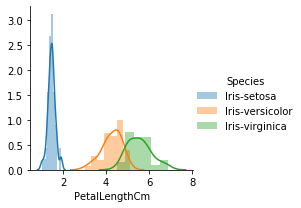

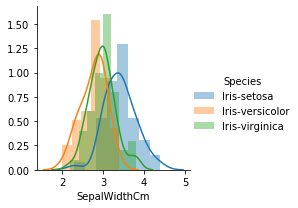

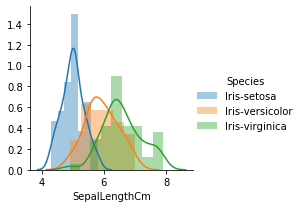

In [15]:
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend()

## Unvariate Analysis

In [16]:
df = iris.drop(["Species"],axis=1)

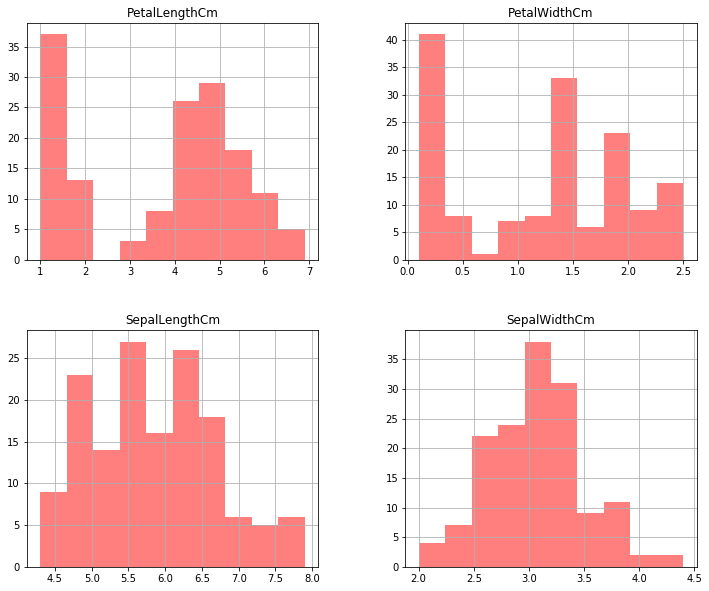

In [17]:
# Histogram Info providing data of All interlinked Graphs:

df.hist(color='red', alpha=0.5, figsize=(12,10), bins= 10);

In [18]:
iris.corr()           #The Corelation of the data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


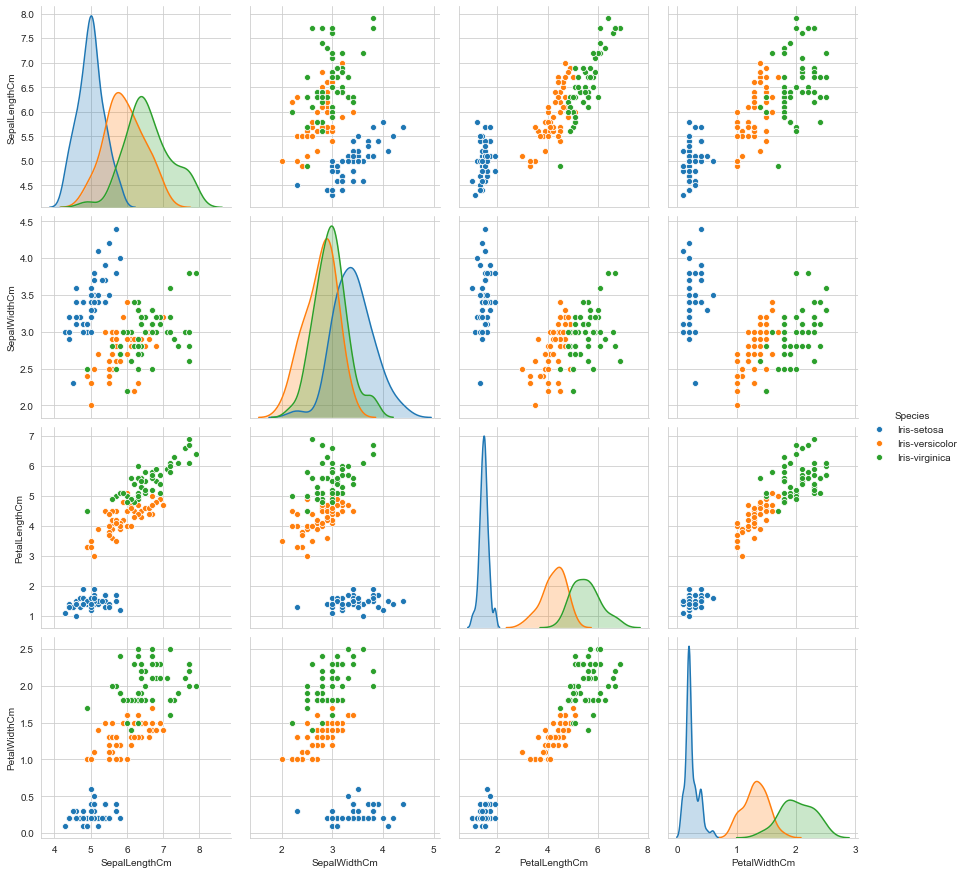

In [20]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue='Species', height = 3)
plt.show()

### DATA VISUALIZATION

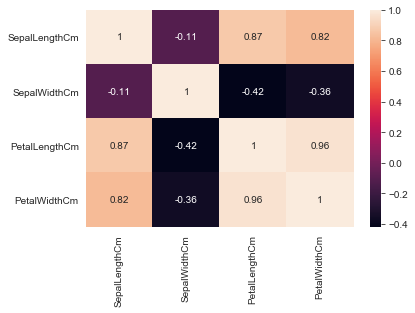

In [21]:
#shows Correlation between Features.
sns.heatmap(iris.corr(),annot=True)

### We can see a Strong Correlation between Petal Width and Petal Length exists. Correlation between Petal Width and Petal Length is 0.96 (~1). Hence, we can drop any 1 of those columns.

## Normalization Of Dataset

In [22]:
labels=iris.drop("Species",axis=1,inplace=True)  #Further the redundancy is been removed

In [23]:
x_vals=iris.values
scal=StandardScaler()
x_vals=scal.fit_transform(x_vals)

# K - Means

#### K-Means is a centroid based algorithm ,or a distance-based algorithm where we calculate the distance to assign a point to a cluster. In K-means, each cluster is associated with a centroid.

In [24]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init =10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Let us use the elbow method to find out 'k' clusters

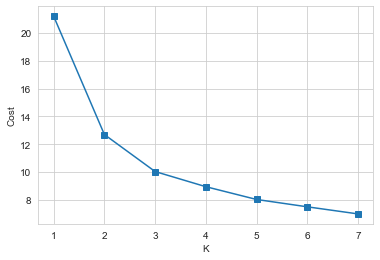

In [27]:
inertia = []
models={}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(x_train)
    models[k]=kmeans
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('K')
plt.ylabel('Cost');
plt.show()

#### We can see an elbow is formed at k=2 and k=3. Since number of unique labels is 3, we use K=3 for our KMeans clustering model

## Splitting Data in Train and Test sets

In [25]:
x_train,x_test=train_test_split(x_vals)

In [26]:
x_train.shape,x_test.shape

((112, 4), (38, 4))

## Plotting Data On Trained & Tested Data

In [28]:
model=models[3]
predictions=model.labels_
centroids=model.cluster_centers_

In [29]:
print(set(predictions))

{0, 1, 2}


In [30]:
def plot_predictions(x_train):
    label_col=['b','r','g','black']
    l_name=['Cluster_1','Cluster_2','Cluster_3','Cluster Centres']
    prediction=model.predict(x_train)
    fig=plt.figure(figsize=(10,10))
    ax=plt.axes()
    for indx,i in enumerate(prediction):
        ax.scatter(x_train[indx,0],x_train[indx,1],c=label_col[i],alpha=0.5,marker='o')
    ax.scatter(centroids[:,0],centroids[:,1],c='black',s=75,marker='X')
    c_1=[]
    for i in range(len(l_name)):
        p=Patch(color=label_col[i], label=l_name[i])
        if i==len(l_name)-1:
            p.set_alpha(1)
        else:
            p.set_alpha(0.5)
            p.set_hatch('o')
            p.set_joinstyle('round')
        c_1.append(p)
    plt.legend(handles=c_1,loc=1)

### Plotting Train Predictions

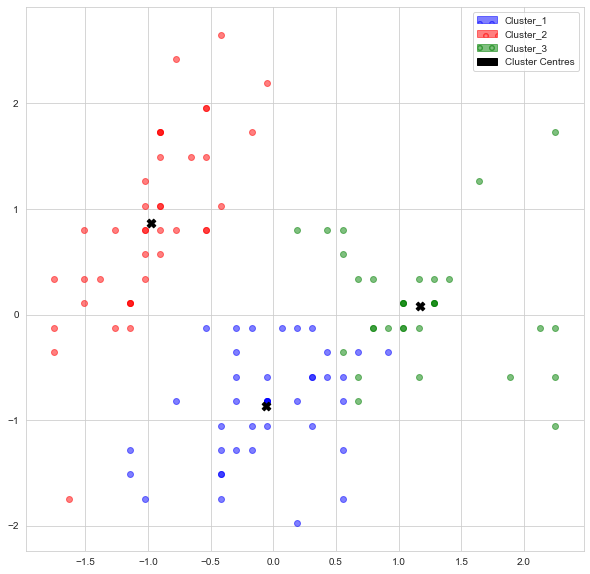

In [31]:
plot_predictions(x_train)

### Plotting Test Predictions

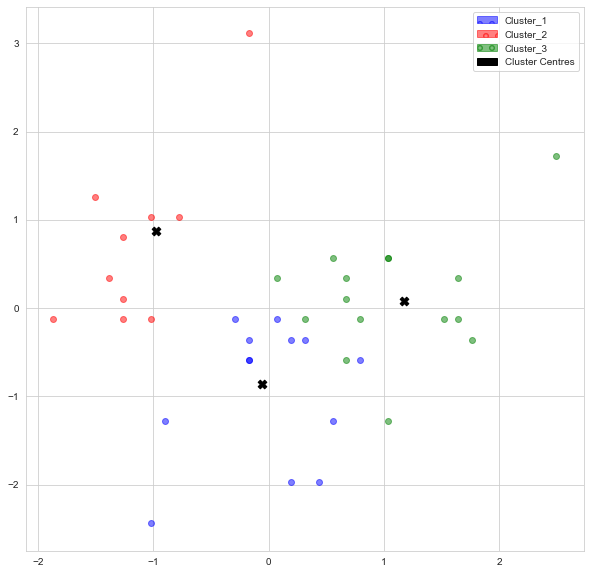

In [32]:
plot_predictions(x_test)

### Plotting Predcitive Clusters of entire data

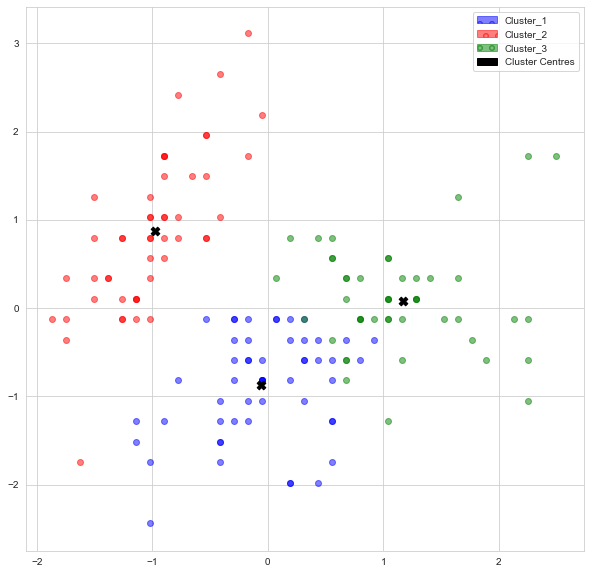

In [37]:
plot_predictions(x_vals)

#### Based on the above 3 predictions plotted against each other the Correaltions between the different features can be observed

# Implementing K-Means Clustering

#### In the Elbow Clustering we can see there is a sharp decrease in WCSS from 2 to 3, and a sudden decrease in WCSS implies an increased performance of the clusters.

In [39]:
kmeans = KMeans(n_clusters =3, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

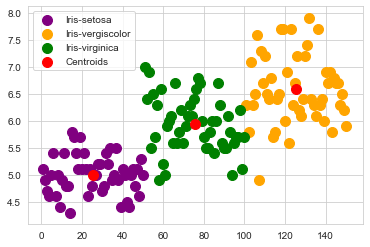

In [40]:
#visualising the clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c = 'purple', label = 'Iris-setosa' )
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c = 'orange', label = 'Iris-vergiscolor' )
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c = 'green', label = 'Iris-virginica' )

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()


### So With the help of the above Analysis Techniques we can predict the optimal No.of Clusters is K= 3. In the last graph we can see how KMean++ algo uses Root Square Value to provide the optimal value in efficient way.

## Thank You 